In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
audio_path = '/content/drive/My Drive/SER Project/Actor_01/03-01-01-01-01-01-01.wav'

In [ ]:
dataset = '/content/drive/MyDrive/SER Project/audio_speech_actors_01-24/'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import numpy as np
import os

In [ ]:
actor_folders = os.listdir(dataset)
actor_folders.sort()
actor_folders

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [ ]:
#Creating A Dataframe For The Given Data

emotions = []
gender = []
actor_ID = []
file_path = []
for i in actor_folders:
    filename = os.listdir(os.path.join(dataset, i))  #iterate over Actor folders
    for f in filename: # go through files in the corresponding Actor's folder
        part = f.split('.')[0].split('-')#We split the file name initially as['03-01-01-01-01-01-01','wav'];Now,the 0th element is converted as ['03','01','01','01','01','01','01']
        emotions.append(int(part[2])) #Since,the second element represents the emotion of the actor.
        actor_ID.append(int(part[6])) #Since,the sixth element represents the ID of the actor.
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female" #Since,even IDs correspond to females.
        else:
            bg = "male"  #Since,odd IDs correspond to females.
        gender.append(bg)
        file_path.append(dataset + i + '/' + f)

In [ ]:
#Creating a dataframe:
audio_df = pd.DataFrame(emotions)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor_ID)],axis=1)
audio_df.columns = ['Gender','Emotion','Actor_ID']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['Path'])],axis=1)
audio_df

,Gender,Emotion,Actor_ID,Path
0,male,neutral,1,/content/drive/MyDrive/SER Project/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav
1,male,happy,1,/content/drive/MyDrive/SER Project/audio_speech_actors_01-24/Actor_01/03-01-03-02-02-01-01.wav
2,male,calm,1,/content/drive/MyDrive/SER Project/audio_speech_actors_01-24/Actor_01/03-01-02-01-02-01-01.wav
3,male,happy,1,/content/drive/MyDrive/SER Project/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-02-01.wav
4,male,calm,1,/content/drive/MyDrive/SER Project/audio_speech_actors_01-24/Actor_01/03-01-02-02-02-01-01.wav
...,...,...,...,...
1435,female,happy,24,/content/drive/MyDrive/SER Project/audio_speech_actors_01-24/Actor_24/03-01-03-01-02-02-24.wav
1436,female,happy,24,/content/drive/MyDrive/SER Project/audio_speech_actors_01-24/Actor_24/03-01-03-02-02-01-24.wav
1437,female,happy,24,/content/drive/MyDrive/SER Project/audio_speech_actors_01-24/Actor_24/03-01-03-01-02-01-24.wav
1438,female,happy,24,/content/drive/MyDrive/SER Project/audio_speech_actors_01-24/Actor_24/03-01-03-01-01-02-24.wav


In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result


def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    return result

In [ ]:
path = np.array(audio_df.Path)[1]
data, sample_rate = librosa.load(path)

X, Y = [], []
for path, emotion in zip(audio_df.Path, audio_df.Emotion):
    feature = get_features(path)
    # for ele in feature:
    #     X.append(ele)
    #     Y.append(emotion)
    X.append(feature)
    Y.append(emotion)

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,labels
0,0.293566,0.673896,0.722096,0.723508,0.682302,0.680533,0.675352,0.628977,0.679179,0.707283,...,0.000007,0.000007,0.000007,0.000007,0.000012,0.000010,0.000011,0.000006,4.254084e-07,neutral
1,0.152289,0.504078,0.551733,0.549600,0.589397,0.627806,0.663789,0.654031,0.675372,0.716412,...,0.000422,0.000303,0.000234,0.000174,0.000139,0.000132,0.000139,0.000114,1.089871e-05,happy
2,0.264025,0.610264,0.674106,0.708518,0.733163,0.679862,0.621189,0.614429,0.638012,0.659570,...,0.000012,0.000014,0.000020,0.000048,0.000081,0.000135,0.000172,0.000057,3.713600e-06,calm
3,0.204187,0.697181,0.686450,0.690078,0.706820,0.673175,0.659655,0.657918,0.687829,0.682273,...,0.000018,0.000013,0.000009,0.000006,0.000004,0.000004,0.000004,0.000005,5.001726e-07,happy
4,0.177698,0.545940,0.612854,0.691112,0.649464,0.601933,0.562597,0.511677,0.500723,0.527097,...,0.000022,0.000012,0.000016,0.000023,0.000036,0.000050,0.000046,0.000028,1.757193e-06,calm


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder

Epoch 1/150, Training Loss: 0.2166, Training Accuracy: 33.68%, Validation Loss: 0.1851, Validation Accuracy: 45.22%
Epoch 2/150, Training Loss: 0.1779, Training Accuracy: 45.40%, Validation Loss: 0.1581, Validation Accuracy: 53.48%
Epoch 3/150, Training Loss: 0.1580, Training Accuracy: 51.48%, Validation Loss: 0.1408, Validation Accuracy: 60.00%
Epoch 4/150, Training Loss: 0.1422, Training Accuracy: 57.81%, Validation Loss: 0.1306, Validation Accuracy: 62.17%
Epoch 5/150, Training Loss: 0.1298, Training Accuracy: 60.50%, Validation Loss: 0.1135, Validation Accuracy: 67.39%
Epoch 6/150, Training Loss: 0.1184, Training Accuracy: 65.71%, Validation Loss: 0.1071, Validation Accuracy: 68.26%
Epoch 7/150, Training Loss: 0.1074, Training Accuracy: 68.23%, Validation Loss: 0.0897, Validation Accuracy: 74.78%
Epoch 8/150, Training Loss: 0.0994, Training Accuracy: 71.61%, Validation Loss: 0.0829, Validation Accuracy: 77.83%
Epoch 9/150, Training Loss: 0.0901, Training Accuracy: 74.83%, Validatio

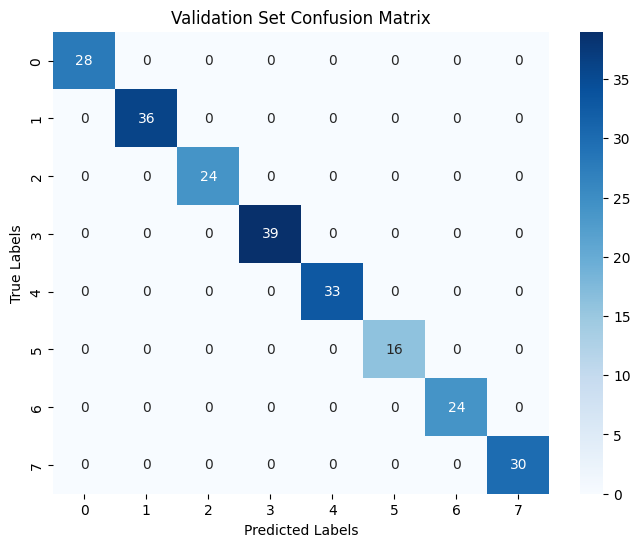

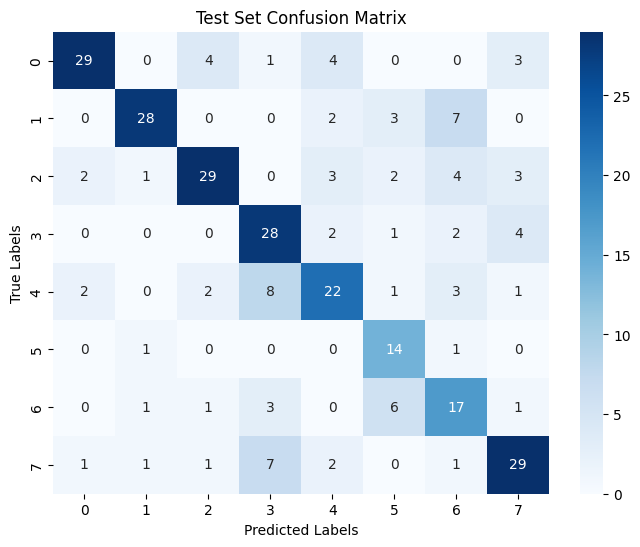

Validation set per-class accuracy:
neutral: 100.00%
calm: 100.00%
happy: 100.00%
sad: 100.00%
angry: 100.00%
fear: 100.00%
disgust: 100.00%
surprise: 100.00%
Test set per-class accuracy:
neutral: 70.73%
calm: 70.00%
happy: 65.91%
sad: 75.68%
angry: 56.41%
fear: 87.50%
disgust: 58.62%
surprise: 69.05%


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import torch.nn as nn
# Assuming `Features` is your DataFrame with the last column as 'labels'
# Load your data into DataFrame 'Features'
# Features = pd.read_csv('path_to_your_features.csv')

# LSTM Model Definition

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

# Prepare the dataset
# Assume the Features dataframe is already defined
y = Features['labels'].values
X = Features.iloc[:, :-1].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Assuming 8 unique classes/emotions
num_classes = 8
emotion_labels = label_encoder.inverse_transform(range(num_classes))

# Split the data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=0, shuffle=True)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data to tensors
X_train_tensor = torch.tensor(X_train_scaled).float()
X_test_tensor = torch.tensor(X_test_scaled).float()

# Convert the encoded labels to tensors
y_train_tensor = torch.tensor(y_train_encoded).long()
y_test_tensor = torch.tensor(y_test_encoded).long()

# Hyperparameters
input_dim = X_train_tensor.shape[1]
hidden_dim = 256
layer_dim = 2
output_dim = num_classes
batch_size = 8
num_epochs = 150

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the size of your validation set
val_size = int(0.2 * len(train_dataset))  # for example, 20% of your training set
train_size = len(train_dataset) - val_size

# Split your training dataset into training and validation datasets
train_data, val_data = torch.utils.data.random_split(train_dataset, [train_size, val_size])
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Create the model, loss function, and optimizer
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.00075)

# Placeholder lists for loss and accuracy (fill these with your actual training data)
# Initialize lists outside the training function
loss_values = []
val_loss_values = []
accuracy_values = []
val_accuracy_values = []

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for i, (features, labels) in enumerate(train_loader):
            # LSTM expects a three-dimensional input: [batch_size, seq_length, features]
            features = features.unsqueeze(1)  # Add a sequence dimension
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Collect loss and accuracy data
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

        # Compute the average loss and accuracy
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = correct_predictions / total_predictions * 100

        # Append training loss and accuracy to lists
        loss_values.append(epoch_loss)
        accuracy_values.append(epoch_accuracy)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for features, labels in val_loader:
                features = features.unsqueeze(1)  # Add a sequence dimension
                outputs = model(features)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

        # Compute the average validation loss and accuracy
        val_epoch_loss = val_loss / len(val_loader.dataset)
        val_epoch_accuracy = val_correct / val_total * 100

        # Append validation loss and accuracy to lists
        val_loss_values.append(val_epoch_loss)
        val_accuracy_values.append(val_epoch_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.2f}%, '
              f'Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_accuracy:.2f}%')


train_model(model, train_loader, val_loader,criterion, optimizer, num_epochs)

# Assuming these are your label mappings
emotion_labels = {0: 'neutral', 1: 'calm', 2: 'happy', 3: 'sad', 4: 'angry', 5: 'fear', 6: 'disgust', 7: 'surprise'}

# Functions to generate confusion matrix plots
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
    plt.title(title)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# Function to calculate accuracy for each class
def per_class_accuracy(conf_matrix):
    class_accuracy = 100 * conf_matrix.diagonal() / conf_matrix.sum(1)
    return class_accuracy

# Function to evaluate model and get predictions
def evaluate_model_and_get_predictions(model, loader):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_targets = []
    with torch.no_grad():  # No gradients required for evaluation
        for inputs, labels in loader:
            # Make sure inputs have the right dimensions:
            # (batch, seq_len, features) where seq_len is 1 for this case
            inputs = inputs.view(-1, 1, inputs.size(-1))  # Reshape inputs
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())
    return all_targets, all_preds


# Evaluation (Assuming the evaluate_model_and_get_predictions function defined above)
val_targets, val_preds = evaluate_model_and_get_predictions(model, val_loader)
test_targets, test_preds = evaluate_model_and_get_predictions(model, test_loader)

# Confusion matrices
val_conf_matrix = confusion_matrix(val_targets, val_preds)
test_conf_matrix = confusion_matrix(test_targets, test_preds)

# Plot confusion matrices
plot_confusion_matrix(val_conf_matrix, classes=emotion_labels, title='Validation Set Confusion Matrix')
plot_confusion_matrix(test_conf_matrix, classes=emotion_labels, title='Test Set Confusion Matrix')

# Print per-class accuracy
val_class_accuracies = per_class_accuracy(val_conf_matrix)
test_class_accuracies = per_class_accuracy(test_conf_matrix)
print("Validation set per-class accuracy:")
for i, accuracy in enumerate(val_class_accuracies):
    print(f'{emotion_labels[i]}: {accuracy:.2f}%')
print("Test set per-class accuracy:")
for i, accuracy in enumerate(test_class_accuracies):
    print(f'{emotion_labels[i]}: {accuracy:.2f}%')

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_values) + 1), loss_values, label='Training Loss')
plt.plot(range(1, len(val_loss_values) + 1), val_loss_values, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy_values) + 1), val_accuracy_values, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()